In [1]:
E = EllipticCurve("11.a1")
print(E)
N = E.conductor()
print("Conductor", N)

Elliptic Curve defined by y^2 + y = x^3 - x^2 - 7820*x - 263580 over Rational Field
Conductor 11


In [18]:
anlist = E.anlist(7500)[1:]

In [19]:
m = lambda z: sum(an * z^(n) for n, an in enumerate(anlist))

In [20]:
mint = lambda z: sum(an/(n + 1) * z^(n + 1) for n, an in enumerate(anlist))

In [21]:
ps = m(x).power_series(RR)

In [22]:
pade = gp.bestapprPade(ps)

In [23]:
p = lambda y: pade.subst(x, y)

In [24]:
m_a = lambda x: p(1/x) # / p(1000000000000)

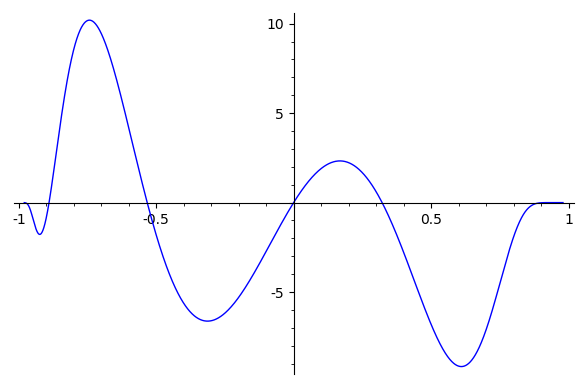

In [26]:
plot(m_a, -0.98, 0.98)

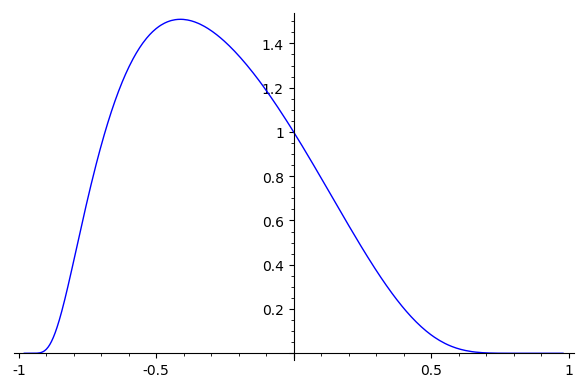

In [31]:
plot(lambda x: m(x), -0.98, 0.98) 

In [ ]:
# WHAT?!

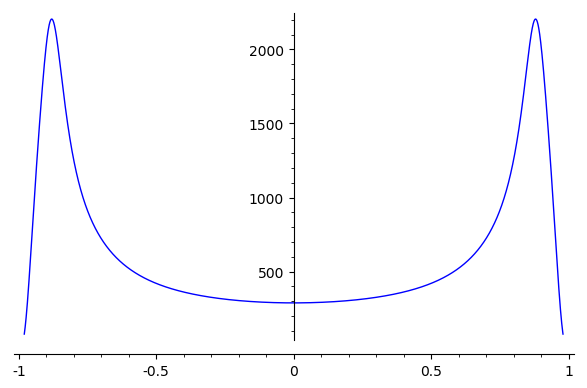

In [17]:
plot(lambda x: abs(m_a(I*x).sage()), -0.98, 0.98)

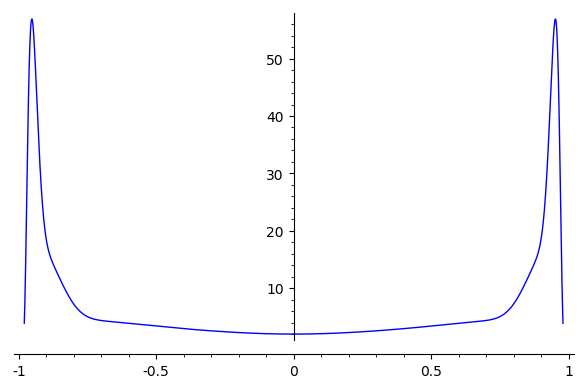

In [188]:
plot(lambda x: abs(mder(I*x)), -0.98, 0.98) 

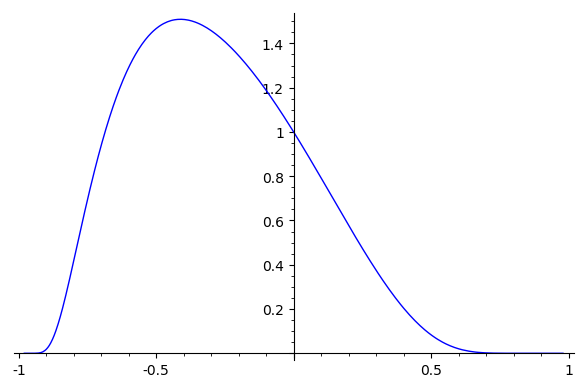

In [183]:
plot(m, -0.98, 0.98)

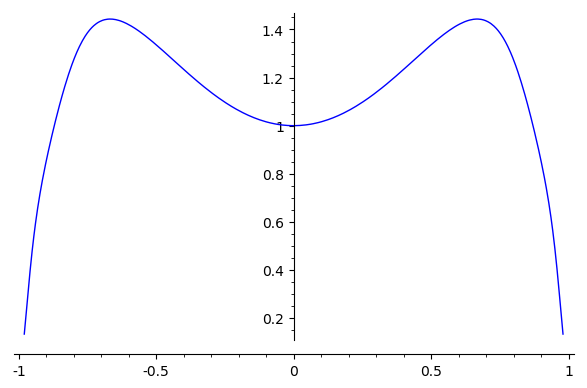

In [250]:
plot(lambda x: abs(m_a(CC(I * x))), -0.98, 0.98)

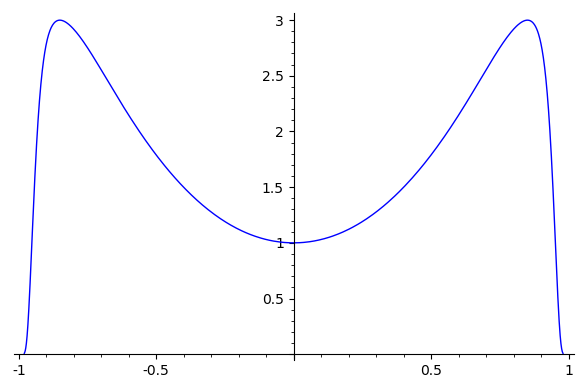

In [249]:
plot(lambda x: abs(m(CC(I * x))), -0.98, 0.98)

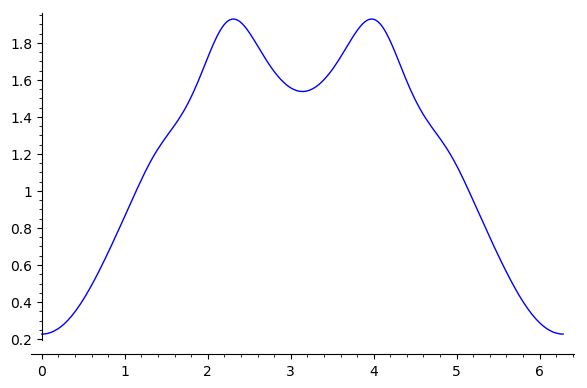

In [252]:
plot(lambda x: abs(m_a(CC(0.5 * exp(I*x)))), 0, 2*pi)

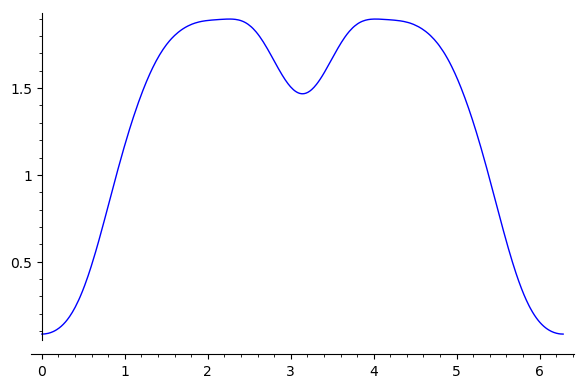

In [251]:
plot(lambda x: abs(m(CC(0.5 * exp(I*x)))), 0, 2*pi)

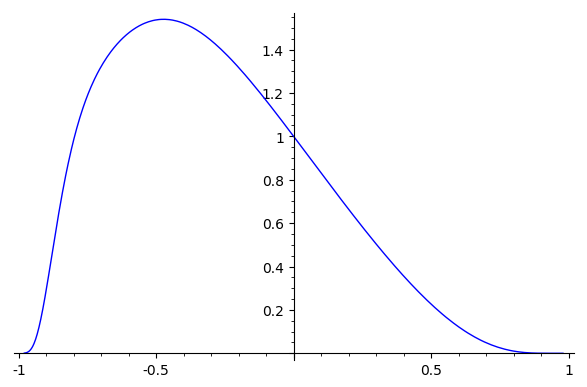

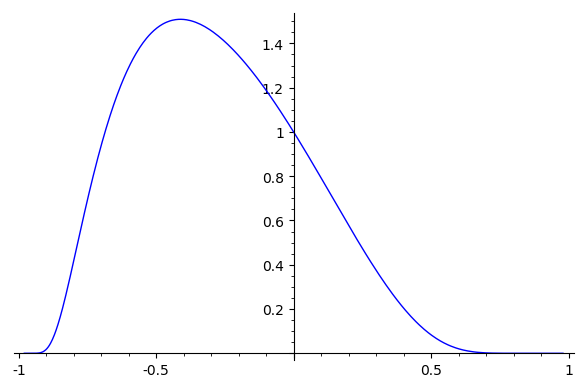

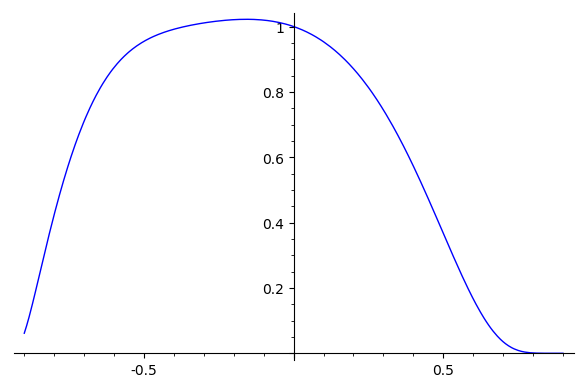

In [241]:
plot(lambda x: m(x) / m_a(x), -0.9, 0.9)

In [13]:
def integral_C_valued(f, lb, ub, max_points = 1000):
    a = numerical_integral(lambda u: f(u).real_part(), lb, ub, max_points = max_points)[0]
    b = numerical_integral(lambda u: f(u).imag_part(), lb, ub, max_points = max_points)[0]
    return a + b*I

integrand_y = lambda z, n: (m(z)/m_a(z))/z^(n + 1)
integrand = lambda z, n: integrand_y(z, n) * I * z
divn = lambda n: CC(factorial(n)/(2*pi*I) * integral_C_valued(lambda phi: integrand(.5*exp(I*phi), n), 0, 2*pi))


In [16]:
a0 = CC(divn(0)); a0

-0.0154690641601873 + 3.62939536743876e-18*I

In [19]:
a1 = CC(divn(1)); a1

0.00489721329483731 + 2.23032579088111e-18*I

In [21]:
a2 = CC(divn(2)); a2

0.0417016325705789 - 1.16661245162515e-17*I

In [22]:
a3 = CC(divn(3)); a3

0.140317749423089 + 2.79692654341068e-16*I

In [23]:
a4 = CC(divn(4)); a4

0.0414523343996202 - 7.95514434160782e-16*I

In [24]:
a5 = CC(divn(5)); a5

-1.26782490975893 - 1.23712215511428e-14*I

In [25]:
a6 = CC(divn(6)); a6

0.359663740322673 + 6.63148682178080e-14*I

In [26]:
a7 = CC(divn(7)); a7

-343.787967701364 - 3.92847440616332e-12*I

In [27]:
a8 = CC(divn(8)); a8

-1053.14285241717 + 9.53430939464720e-12*I

In [31]:
repair_term = lambda x: (a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4 + a5*x^5 + a6*x^6 + a7*x^7 + a8*x^8).real_part()

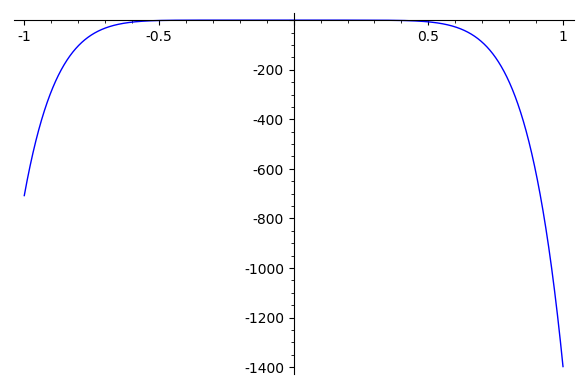

In [32]:
plot(repair_term)

In [ ]:
# WTF?! I did something wrong...